In [2]:
#@title Importing Packages

# Utility
import math as math
import numpy as np
import pandas as pd
import random as rdm
import scipy.io as io
import scipy.stats as stats
from google.colab import drive
import networkx as nx

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as col
from matplotlib.animation import FuncAnimation
from functools import partial

# Bayesian inference

2 1
219 112
68 45


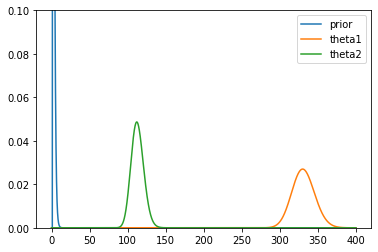

In [77]:
paramArray = np.array([[2, 1],
                       [219, 112],
                       [68, 45]])

for i, name in enumerate(['prior', 'theta1', 'theta2']):
    params = paramArray[i, :]
    print(params[0], params[1])
    x = np.linspace(0, 400, 10001)
    p = stats.gamma(params[0], params[1]).pdf(x)
    mu = params[0]*params[1]

    plt.plot(x, p, label = name)
    #plt.plot([mu, mu], [0, 1], label = name)

plt.ylim(0, .1)
plt.legend()

In [80]:
Z = stats.norm(0, 1)
p = Z.ppf(0.99)
p

2.3263478740408408

In [91]:
(1.9/Z.ppf(0.99))**2

0.6670492275838247

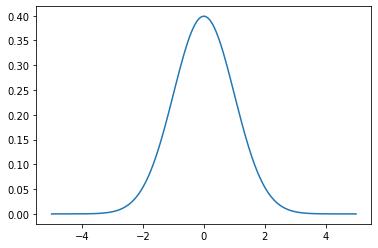

In [85]:
Z.pdf(np.linspace(-5, 5, 10000))
plt.plot(np.linspace(-5, 5, 10000), Z.pdf(np.linspace(-5, 5, 10000)))

ValueError: ignored

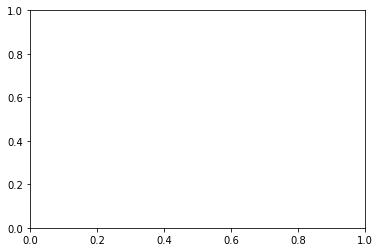

In [43]:
paramArray = np.array([[1.955, 219, 112],
                       [1.5, 68, 45]])

for i, name in enumerate(['theta1', 'theta2']):

    params = paramArray[i, :]
    x = np.linspace(0, 400, 401)
    p = stats.nbinom.pmf(params[0], params[1], params[2])

    plt.plot(x, p, label = name)
plt.ylim(0, 1)
plt.legend()

In [42]:
p

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

# Gibbs sampler

In [5]:
#@title Initialising

A = [12, 9, 12, 14, 13, 13, 15, 8, 15, 6]
B = [11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7]
S = 1000

In [65]:
#@title Sampling theta

theta = stats.gamma(2 + sum(A), 1 + len(A))
thetaA = theta.rvs(S)

Ts = [stats.poisson(t).rvs(10) for t in thetaA]
Ts = [np.mean(y)/np.var(y) for y in Ts]
Ts

[0.9063870919770987,
 0.717003219198127,
 1.25,
 1.1469150885766646,
 0.7875264270613109,
 1.2357414448669202,
 1.027013251783894,
 0.9965261221987604,
 0.6792058516196448,
 0.8072510014257587,
 1.1565896739130435,
 0.7302142544818541,
 1.4741281761135685,
 1.8402574605032183,
 0.664512219753585,
 3.423913043478261,
 1.1750870260607773,
 1.3410470409711683,
 1.238988893144389,
 1.1787616246721246,
 2.546609301372669,
 1.6973525063835506,
 0.648169736535323,
 0.44319600499375783,
 0.9593367548361627,
 0.6219836234477523,
 1.5189873417721516,
 1.4769340803433069,
 0.9820067093626105,
 0.9447788537032192,
 1.368813825608798,
 0.9731543624161073,
 0.5890774348393618,
 1.7539267015706805,
 1.2605554990334724,
 1.3165519739224918,
 1.3020372010628873,
 5.093710953769263,
 1.3762976667694524,
 0.6558552595289315,
 2.9050925925925926,
 2.3090649536045684,
 0.9604701714837774,
 1.0067471590909092,
 1.2740384615384615,
 0.9440828609419832,
 1.102632582983594,
 1.616515045486354,
 0.6968419837191

In [61]:
T = np.mean(A)/np.var(A)
T

1.3912009512485135

In [66]:
pb = sum([1 for y in Ts if y > T])/S

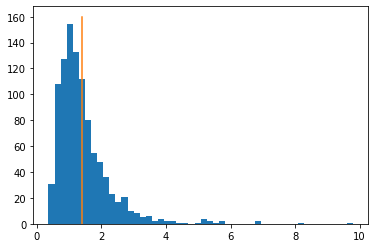

In [70]:
plt.hist(Ts, bins = 50)
plt.plot([T, T], [0, 160])

---

# Midge wings

In [66]:
stats.gamma(2, 1).pdf(np.linspace(0, 10, 1001))

array([0.        , 0.        , 0.        , ..., 0.00113061, 0.0011206 ,
       0.00111069])

In [110]:
#@title Initialising
y = [1.64, 1.70, 1.72, 1.74, 1.82, 1.82, 1.82, 1.90, 2.08]
n = len(y)
ybar = np.mean(y)
s2 = np.var(y)

muNaught = 1.9
tauNaught =  0.95**2
sigma2Naught = 0.01
nu = 1

S = 1000
phi = [ybar, s2]
PHI = np.zeros((S, 2))
PHI[0, :] = phi

rdm.seed(1)

for s in range(1, S):

    mun = (muNaught/tauNaught + n*ybar/phi[1])/(1/tauNaught + n/phi[1])
    t2n = 1/(1/tauNaught + n/phi[1])
    phi[0] = stats.norm(mun, np.sqrt(t2n)).rvs(1)

    nun = nu + n
    s2n = (nu*sigma2Naught + (n - 1)*s2 + n*(ybar - phi[0])**2)/nun

    phi[1] = stats.invgamma(nun/2, s2n*nun/2).rvs(1)
    PHI[s, :] = phi

In [108]:
#for (s in 2:S) {
# Sample theta (phi[1]) from full conditional based on sigmaˆ2 (phi[2])
# According to normal(\mu_n, \tauˆ2_n) where \mu_n and \tauˆ2_n are as below
#mun = (mu/t2 + n*ybar/phi[2])/(1/t2 + n/phi[2])
#t2n = 1/(1/t2 + n/phi[2])
#phi[1] = rnorm(1, mun, sqrt(t2n))
# Sample sigmaˆ2 from its full conditional based on theta
#nun = nu + n
#s2n = (nu*s20 + (n-1)*s2 + n*(ybar-phi[1])ˆ2)/nun
# This posterior distribution: inverse-gamma(nu_n/2,sigmaˆ2_n(\theta)
#phi[2] = rinvgamma(1, nun/2, s2n*nun/2)
#PHI[s, ] = phi
#}

SyntaxError: ignored

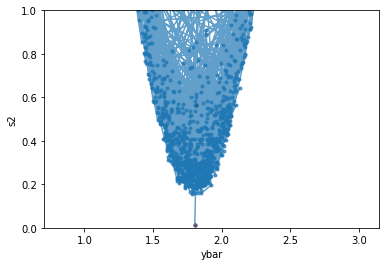

In [119]:
plt.plot(PHI[:, 0], PHI[:, 1], '.-', alpha = 0.7)
plt.ylim(0, 1)
plt.xlabel("ybar")
plt.ylabel("s2")
plt.scatter(np.mean(PHI[0, 0]), np.mean(PHI[0, 1]), c = 'r', s = 10)
plt.scatter(np.mean(PHI[:, 0]), np.mean(PHI[:, 1]), c = 'k', s = 10)

(array([ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         3.,  0.,  1.,  1.,  3.,  0.,  1.,  4.,  3.,  1.,  4.,  5.,  6.,
         5., 10., 17., 14., 12., 14., 13., 15., 32., 25., 22., 27., 30.,
        31., 38., 41., 47., 40., 36., 41., 39., 38., 49., 50., 24., 32.,
        22., 34., 22., 26., 15., 12., 10.,  9., 16.,  7., 10.,  6.,  8.,
         3.,  3.,  3.,  3.,  2.,  0.,  3.,  1.,  0.,  0.,  0.,  2.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.81716868, 0.83934641, 0.86152414, 0.88370186, 0.90587959,
        0.92805732, 0.95023505, 0.97241278, 0.99459051, 1.01676824,
        1.03894597, 1.0611237 , 1.08330142, 1.10547915, 1.12765688,
        1.14983461, 1.17201234, 1.19419007, 1.2163678 , 1.23854553,
        1.26072325, 1.28290098, 1.30507871, 1.32725644, 1.34943417,
        1.3716119 , 1.39378963, 1.41596736, 1.43814509, 1.46032281,
        1.48250054, 1.5046

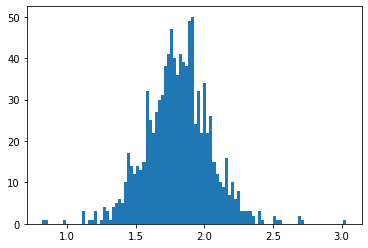

In [124]:
plt.hist(PHI[:, 0], bins = 100)

(array([  1.,   3.,  94., 176., 131., 137.,  87.,  85.,  42.,  41.,  32.,
         28.,  24.,  18.,  18.,  14.,  10.,   6.,   6.,   6.,   2.,   8.,
          3.,   2.,   2.,   4.,   2.,   3.,   0.,   0.,   1.,   0.,   1.,
          2.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.01500247, 0.08695719, 0.15891192, 0.23086664, 0.30282137,
        0.37477609, 0.44673082, 0.51868554, 0.59064026, 0.66259499,
        0.73454971, 0.80650444, 0.87845916, 0.95041389, 1.02236861,
        1.09432333, 1.16627806, 1.23823278, 1.31018751, 1.38214223,
        1.45409696, 1.52605168, 1.5980064 , 1.

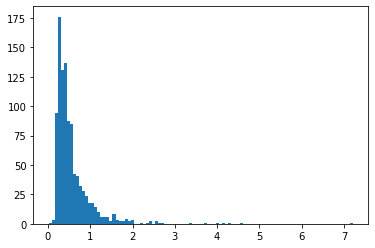

In [125]:
plt.hist(PHI[:, 1], bins = 100)